## Aprendizaje Supervisado<a class="tocSkip">
  ## EL460 ELECTIVA I - CIENCIA DE DATOS II <a class="tocSkip">
  ### Ingenieria Electrónica <a class="tocSkip">
  ### Universidad Popular del Cesar <a class="tocSkip">
  ### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Algunas buenas prácticas

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Generar/usar una base de datos

Usaremos base de datos [Titanic](https://www.kaggle.com/c/titanic/data)

La base de datos que utilizarán cuenta con 9 variables independientes y una variable respuesta. Las variables son:

- *survival* : 0 si no sobrevivió, 1 si sobrevivió (variable respuesta).

- *pclass*: clase del ticket. 1 = primera clase, 2 = segunda clase, 3 = tercera clase.

- *sex*: Sexo del pasajero. Male = Masculino, Female = Femenino.

- *Age*: Edad en años del pasajero. 

- *sibsp*: Número de familiares (hermanos, pareja) en el Titanic

- *parch*: Número de padres o hijos en el Titanic.

- *ticket*: Número de ticket.

- *fare*: El costo del pasaje.

- *cabin*: El número de cabina.

- *Embarked*: Puerto donde embarcó. C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Análisis exploratorio de la base de datos

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos hacer gráficos exploratorios para entender la base de datos

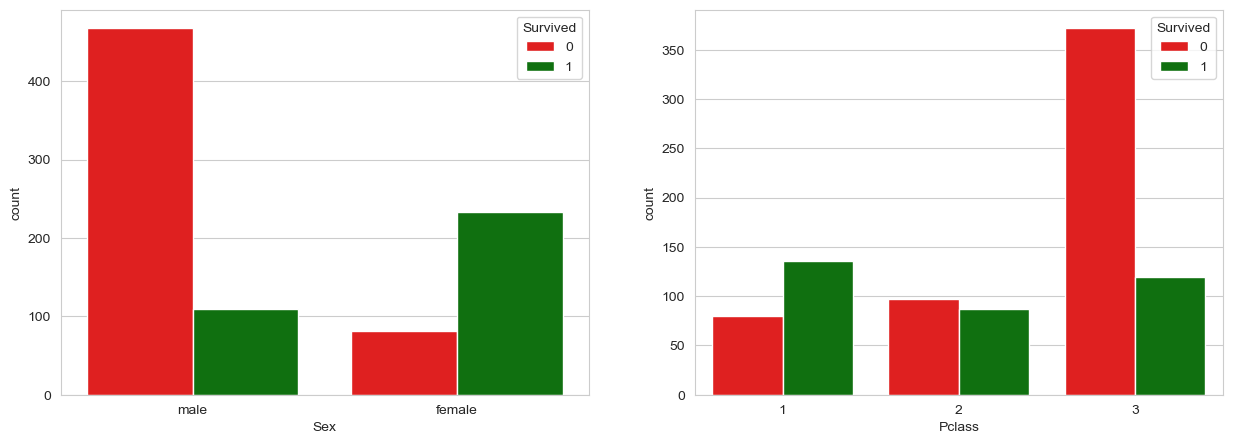

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=train_data['Sex'],hue=train_data['Survived'],palette=('red','green'))

plt.subplot(1,2,2)
sns.countplot(x=train_data['Pclass'],hue=train_data['Survived'],palette=('red','green'))
plt.show()

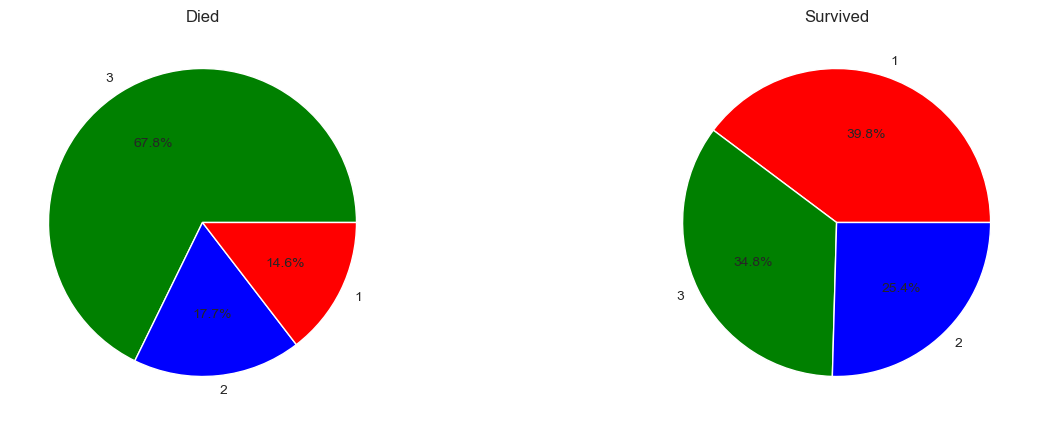

In [9]:
plt.figure(figsize=(15,5))

var = 'Pclass'
plt.subplot(1,2,1)
plt.title('Died')
plt.pie(train_data.groupby('Survived')[var].value_counts()[0],
        labels=train_data.groupby('Survived')[var].value_counts()[0].index,
        autopct='%1.1f%%', colors=['green','blue','red'])

plt.subplot(1,2,2)
plt.title('Survived')
plt.pie(train_data.groupby('Survived')[var].value_counts()[1],
        labels=train_data.groupby('Survived')[var].value_counts()[1].index,
        autopct='%1.1f%%', colors=['red','green','blue'])
plt.show()

Podemos hacer tablas para entender un poco más.

Calculemos el valor medio de la variable supervivencia en función de la clase

In [10]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Analicemos la supervivencia en función del sexo

In [11]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


O en función de la edad

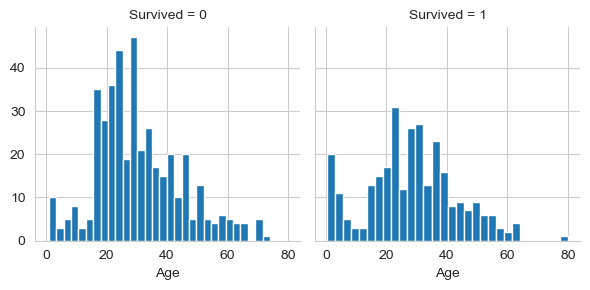

In [12]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=30)
plt.show()

## Selección de variables o features

Podemos tirar las variables PassengerId y Ticket. Cabin está muy incompleta así que la podemos tirar también.

In [13]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
PassengerID_val = test_data.PassengerId

In [15]:
drop_vars = ['PassengerId', 'Ticket', 'Cabin']

train_data = train_data.drop(drop_vars, axis=1)
test_data = test_data.drop(drop_vars, axis=1)


Qué información hay en la variable Name?

In [16]:
for dataset in (train_data, test_data):
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in (train_data, test_data):
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [18]:
for dataset in (train_data, test_data):
    dataset.drop('Name', axis=1, inplace=True)

## Imputación de datos faltantes

In [19]:
from sklearn.impute import SimpleImputer

- [Documentación](https://scikit-learn.org/stable/modules/impute.html) de sklearn

In [20]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [21]:
for dataset in (train_data, test_data):
    dataset['Age'] = SimpleImputer(strategy="median").fit_transform(np.array(dataset['Age']).reshape(-1, 1))
    dataset['Embarked'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(dataset['Embarked']).reshape(-1, 1))


In [22]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

## Transformación de variables

In [23]:
from sklearn.preprocessing import LabelEncoder

La variables categóricas deber transformarse a numéricas

In [24]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rare
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,28.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [25]:
Te = LabelEncoder()
for dataset in (train_data, test_data):
    dataset['Title'] = Te.fit_transform(dataset['Title'])

In [26]:
Te.inverse_transform([0,1,2,3,4])

array(['Master', 'Miss', 'Mr', 'Mrs', 'Rare'], dtype=object)

In [27]:
se = LabelEncoder()
for dataset in (train_data, test_data):
    dataset['Sex'] = se.fit_transform(dataset['Sex'])

In [28]:
se.classes_

array(['female', 'male'], dtype=object)

In [29]:
Eenc = LabelEncoder()
for dataset in (train_data, test_data):
    dataset['Embarked'] = Eenc.fit_transform(dataset['Embarked'])
Eenc.classes_

array(['C', 'Q', 'S'], dtype=object)

In [36]:
train_data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBand,FareBand
0,0,3,1,1,0,2,2,1,0
1,1,1,0,1,0,0,3,2,0
2,1,3,0,0,0,2,1,1,0
3,1,1,0,1,0,2,3,2,0
4,0,3,1,0,0,2,2,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,2,4,1,0
887,1,1,0,0,0,2,1,1,0
888,0,3,0,1,2,2,1,1,0
889,1,1,1,0,0,0,2,1,0


Bandas para Age y Fare

In [37]:
for dataset in (train_data, test_data):
    dataset['AgeBand'] = pd.cut(dataset['Age'], 5)
    dataset.drop('Age', axis=1, inplace=True)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

KeyError: 'Age'

In [38]:
Aenc = LabelEncoder()
for dataset in (train_data, test_data):
    dataset['AgeBand'] = Aenc.fit_transform(dataset['AgeBand'])
Aenc.classes_

array([0, 1, 2, 3, 4])

In [39]:
for dataset in (train_data, test_data):
    dataset['FareBand'] = pd.cut(dataset['Fare'], 4)
    dataset.drop('Fare', axis=1, inplace=True)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

KeyError: 'Fare'

In [40]:
Fenc = LabelEncoder()
for dataset in (train_data, test_data):
    dataset['FareBand'] = Fenc.fit_transform(dataset['FareBand'])
Fenc.classes_

array([0, 1, 2, 3, 4])

## Train test split

- Train Dataset: Used to fit the machine learning model.

- Test Dataset: Used to evaluate the fit machine learning model.

- Stratified* Importante chequear en datos desbalanceados.

In [41]:
X = train_data.drop('Survived',axis=1)
y = train_data.Survived

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((623, 8), (623,), (268, 8), (268,))

## Comparación de Modelos

- [Documentación](https://scikit-learn.org/stable/model_selection.html) de sklearn acerca de selección de modelo.

- [Documentación](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) de sklear acerca de métricas de bondad de modelo

In [45]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)


Arbol de decisión
Accuracy train Arbol de decisión: 87.96%
Accuracy test Arbol de decisión: 81.34%
Random Forest
Accuracy train Random Forest: 87.96%
Accuracy test Random Forest: 82.46%
Regresión Logística
Accuracy train Regresión Logística: 80.58%
Accuracy test Regresión Logística: 79.48%
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 84.27%
Accuracy test Perceptrón multicapa: 83.21%
XGBoost
Accuracy train XGBoost: 87.48%
Accuracy test XGBoost: 82.46%
Naive Bayes
Accuracy train Naive Bayes: 79.78%
Accuracy test Naive Bayes: 81.72%
SVM
Accuracy train SVM: 80.42%
Accuracy test SVM: 78.36%


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
models = pd.DataFrame({'Model':names, 'Score':accuracy_models})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Perceptrón multicapa,0.832090
1,Random Forest,0.824627
4,XGBoost,0.824627
5,Naive Bayes,0.817164
0,Arbol de decisión,0.813433
2,Regresión Logística,0.794776
6,SVM,0.783582


## Selección de hiperparámetros

In [49]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'hidden_layer_sizes':(100, (10,10)),
                'activation': ('relu','tanh'),
                'solver': ('sgd', 'adam'),
                'alpha': np.logspace(-5,-2,3),
                'learning_rate': ('constant', 'adaptive')}

grid = GridSearchCV(MLPClassifier(max_iter=300), parameter_grid)
grid.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

GridSearchCV(estimator=MLPClassifier(max_iter=300),
             param_grid={'activation': ('relu', 'tanh'),
                         'alpha': array([1.00000000e-05, 3.16227766e-04, 1.00000000e-02]),
                         'hidden_layer_sizes': (100, (10, 10)),
                         'learning_rate': ('constant', 'adaptive'),
                         'solver': ('sgd', 'adam')})

In [50]:
grid.best_params_

{'activation': 'relu',
 'alpha': 1e-05,
 'hidden_layer_sizes': (10, 10),
 'learning_rate': 'constant',
 'solver': 'adam'}

Comparación con RandomForest

In [51]:
parameter_grid2 = {'n_estimators':(10,100,200),
                'criterion': ('gini', 'entropy', 'log_loss'),
                'max_depth': (None, 10, 20),
                'max_features': ('sqrt', 'log2')}

grid2 = GridSearchCV(RandomForestClassifier(n_jobs=2), parameter_grid2)
grid2.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return

GridSearchCV(estimator=RandomForestClassifier(n_jobs=2),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (None, 10, 20),
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': (10, 100, 200)})

In [52]:
grid2.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [53]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)


for clfi in [MLPClassifier(**grid.best_params_, max_iter=300), RandomForestClassifier(**grid2.best_params_, n_jobs=2)]:
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train, y_train)):
        xi, yi = np.array(x_train)[train_idx], np.array(y_train)[train_idx]
        x_valid, y_valid = np.array(x_train)[val_idx], np.array(y_train)[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"accuracy test fold {fold}: {accuracy * 100.0 :.2f}" % ())
    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=300)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy test fold 0: 80.00


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy test fold 1: 85.60


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy test fold 2: 76.80


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy test fold 3: 79.03
accuracy test fold 4: 84.68
Avg. accuracy = 81.22193548387096
RandomForestClassifier(max_features='sqrt', n_estimators=10, n_jobs=2)
accuracy test fold 0: 80.00
accuracy test fold 1: 80.00
accuracy test fold 2: 85.60
accuracy test fold 3: 78.23
accuracy test fold 4: 82.26
Avg. accuracy = 81.21677419354839


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Selección de modelo final y análisis de resultados

In [54]:
clf = MLPClassifier(**grid.best_params_, max_iter=400)
clf = clf.fit(x_train, y_train)
test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
accuracy*100

81.71641791044776

In [55]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       159
           1       0.82      0.71      0.76       109

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



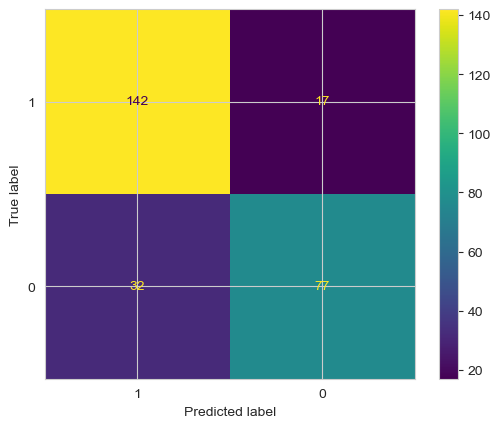

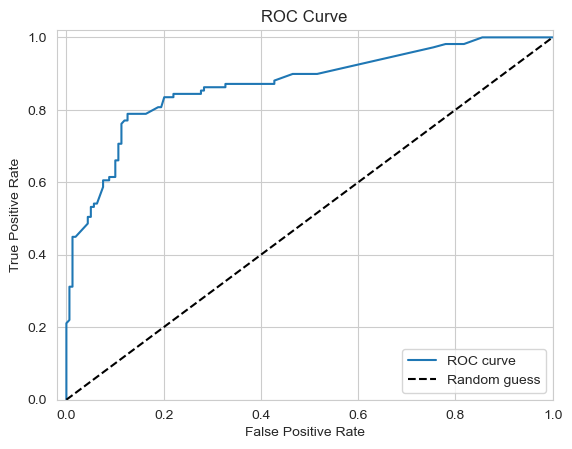

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, display_labels=(1,0))
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [57]:
roc_auc_score(y_test, test_predictions)

0.7997518896774566

### Entrega

In [58]:
submission = pd.DataFrame({
        "PassengerId": PassengerID_val,
        "Survived": clf.predict(test_data)
    })
#submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Ejemplo basado en este [link](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

[Doc](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) sobre curvas Receiver Operating Characteristic (ROC)